In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
#Load in the csv files created from the data collection notebook
df_wsb = pd.read_csv('./csv_files/wsb_data.csv')
df_wsb_test = pd.read_csv('./csv_files/wsb_data_test.csv')
df_sm = pd.read_csv('./csv_files/sm_data.csv')
df_sm_test = pd.read_csv('./csv_files/sm_data_test.csv')

In [41]:
#Combine the the dataframes into a train and test dataframe
df = pd.concat([df_wsb,df_sm], axis = 0)
df_test = pd.concat([df_wsb_test,df_sm_test],axis = 0)

In [42]:
#Drop unnamed index column

df.drop(columns='Unnamed: 0',inplace= True)
df_test.drop(columns='Unnamed: 0',inplace= True)

In [43]:
#Check for Null values
df.isnull().sum()

subreddit         0
selftext       4671
title             0
created_utc       0
dtype: int64

In [44]:
df_test.isnull().sum()

subreddit        0
selftext       114
title            0
created_utc      0
dtype: int64

In [45]:
#Replace the null values in the selftext column with a blank space, theres no way for us to get that data and we dont want to drop it all
df.fillna('',inplace = True)
df_test.fillna('',inplace = True)

In [46]:
df['subreddit'].value_counts(normalize=True)

wallstreetbets    0.5
StockMarket       0.5
Name: subreddit, dtype: float64

As said in the data collection notebook the data was brought in equal amounts, so we can judge our models performance based on that baseline of being able to predict 50% of the posts if we just guess one subreddit on all of the posts.

In [47]:
#Binarize the subreddits class
df['subreddit'] = df['subreddit'].map({'wallstreetbets': 1, 'StockMarket': 0 })
df_test['subreddit'] = df_test['subreddit'].map({'wallstreetbets': 1, 'StockMarket': 0 })

In [48]:
#Check to make sure the subreddits were correctly mapped
df['subreddit'].value_counts()

1    4000
0    4000
Name: subreddit, dtype: int64

# EDA

<Figure size 1500x500 with 0 Axes>

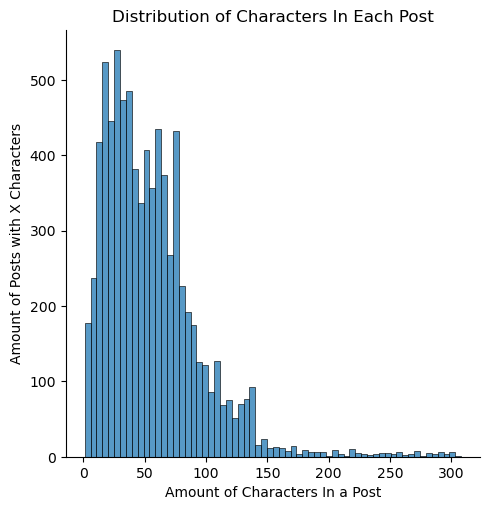

In [49]:
plt.figure(figsize= (15,5))
sns.displot(df['title'].str.len())
plt.xlabel('Amount of Characters In a Post')
plt.ylabel('Amount of Posts with X Characters')
plt.title('Distribution of Characters In Each Post');

From the above plot we can see that we have most post have around 30-50 characters within each post, but our plot does skew right so the amount of characters in a post is not normally distributed.

In [50]:
#Create X and y 
X= df['title']
y = df['subreddit']

In [51]:
# Import the Count vectorizer and train test split to be used for eda
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [52]:
#Train test split X and y
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state = 42)

In [53]:
#Transform the X_train to get the most common single words from both subreddits
cvec = CountVectorizer(stop_words=['english','www','https']) # Get rid of url stopwords and common english words
cvec.fit(X_train)
X_train = cvec.transform(X_train)
train_df = pd.DataFrame(X_train.todense(),columns = cvec.get_feature_names_out())
train_df['subreddit'] = y_train.values


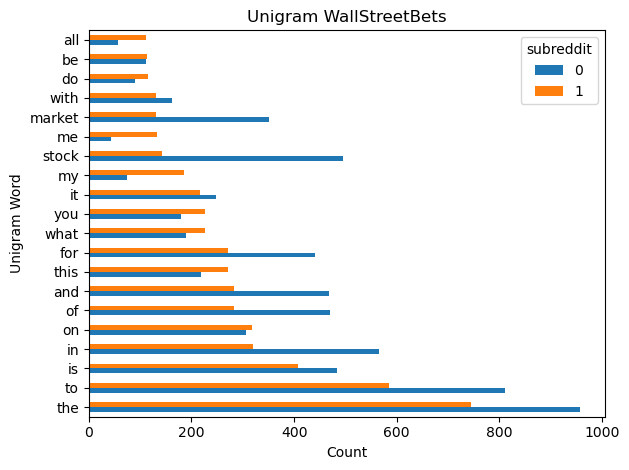

In [54]:
#Compare the subreddits to the most common words found in the wallstreetbets subreddit
train_df.groupby('subreddit').sum().T.sort_values(1,ascending= False).head(20).plot.barh()
plt.title('Unigram WallStreetBets')
plt.xlabel('Count')
plt.ylabel('Unigram Word')
plt.tight_layout()
plt.savefig('./images/UnigramWsb')


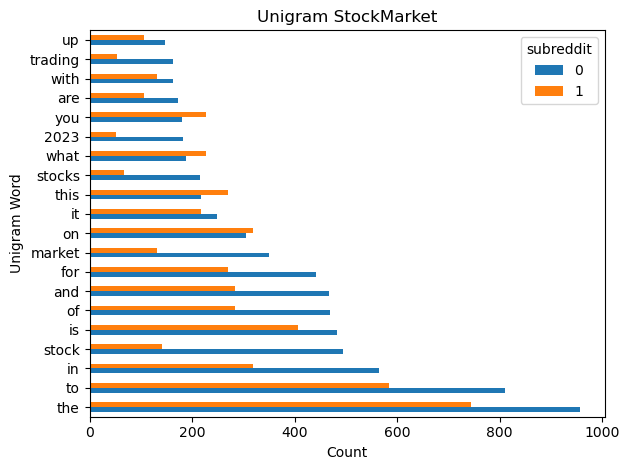

In [55]:
#Compare the subreddits to the most common words found in the StockMarket subreddit
train_df.groupby('subreddit').sum().T.sort_values(0,ascending= False).head(20).plot.barh()
plt.title('Unigram StockMarket')
plt.xlabel('Count')
plt.ylabel('Unigram Word')
plt.tight_layout()
plt.savefig('./images/UnigramStockMarket')

From the above 2 plots we can sttart seeing that there are differences in the language used from each subreddit, the wallstreetbets subreddit looks like it uses words that are risky such as puts and options.

In [56]:
#Re train-test-split the X and y so we can transform the text and get the most common bi-gram combinations
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state = 42)
cvec = CountVectorizer(ngram_range=(2,2),stop_words=['www','https']) # We don't stop words on english because common words like the are important in these subreddits
cvec.fit(X_train)
X_train = cvec.transform(X_train)
train_df_bi = pd.DataFrame(X_train.todense(),columns = cvec.get_feature_names_out())
train_df_bi['subreddit'] = y_train.values


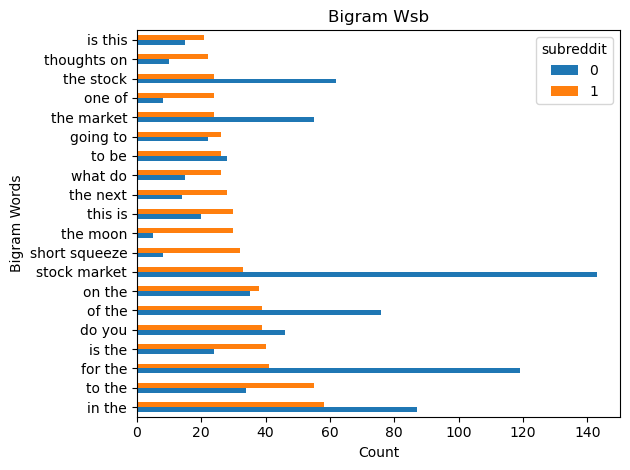

In [57]:
#Compare the subreddits to the most common bigram combinations found in the wallstreetbets subreddit
train_df_bi.groupby('subreddit').sum().T.sort_values(1,ascending= False).head(20).plot.barh()
plt.title('Bigram Wsb')
plt.xlabel('Count')
plt.ylabel('Bigram Words')
plt.tight_layout()
plt.savefig('./images/BigramWsb')

One of the bigrams from wallstreetbets thats common is short squeeze, this also is a risky stock option where people try and short a stock and buy a lot when the stock gets really low.

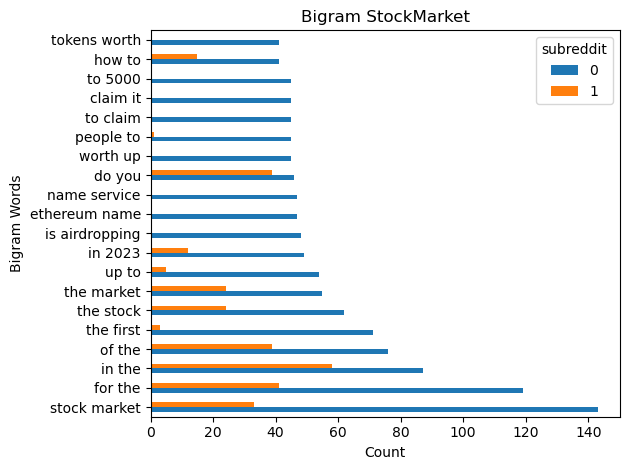

In [58]:
#Compare the subreddits to the most common bigram combinations found in the StockMarket subreddit
train_df_bi.groupby('subreddit').sum().T.sort_values(0,ascending = False).head(20).plot.barh()
plt.title('Bigram StockMarket')
plt.xlabel('Count')
plt.ylabel('Bigram Words')
plt.tight_layout()
plt.savefig('./images/BigramStockMarket')

In [59]:
#Re train-test-split the X and y so we can transform the text and get the most common tri-gram combinations
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state = 42)
cvec = CountVectorizer(ngram_range=(3,3),stop_words=['www','https'])
cvec.fit(X_train)
X_train = cvec.transform(X_train)
train_df_tri = pd.DataFrame(X_train.todense(),columns = cvec.get_feature_names_out())
train_df_tri['subreddit'] = y_train.values

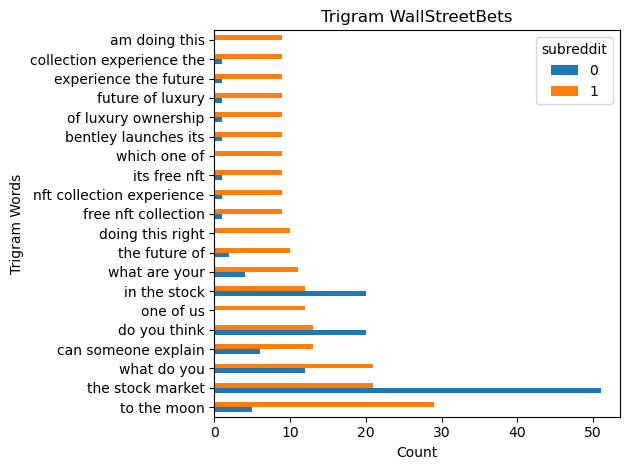

In [60]:
#Compare the subreddits to the most common trigram combinations found in the wallstreebets subreddit
train_df_tri.groupby('subreddit').sum().T.sort_values(1,ascending= False).head(20).plot.barh()
plt.title('Trigram WallStreetBets')
plt.xlabel('Count')
plt.ylabel('Trigram Words')
plt.tight_layout()
plt.savefig('./images/TrigramWsb')

One of the most common phrases said on the wallstreetbets subreddit is the phrase to the moon, and as shown in the plot it does show up the most out of all the trigrams.

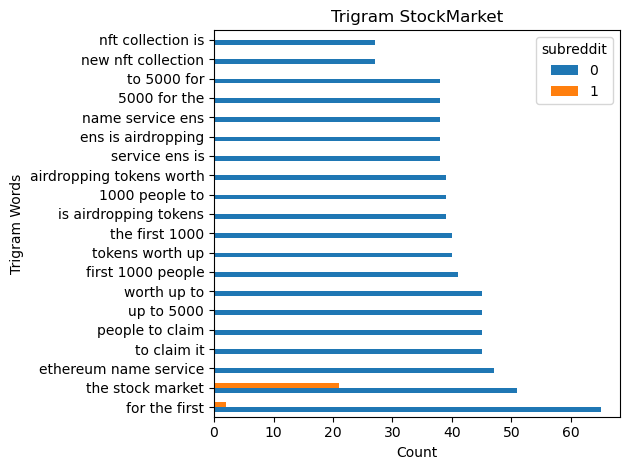

In [61]:
#Compare the subreddits to the most common trigram combinations found in the StockMarket subreddit
train_df_tri.groupby('subreddit').sum().T.sort_values(0,ascending= False).head(20).plot.barh()
plt.title('Trigram StockMarket')
plt.xlabel('Count')
plt.ylabel('Trigram Words')
plt.tight_layout()
plt.savefig('./images/TrigramStockMarket')

It looks like the top trigrams for the stockmarket subreddit seemed to be mentioning about giving away some sort of stock and about nfts.